In [2]:
import sys
sys.path.append('../../code/')

In [3]:
%load_ext autoreload
%autoreload 2

from libs import io
from libs import constants
from libs import vis
from libs import helpers
from libs.metrics import aggregators
from libs.metrics import helpers as helpers_metrics
# from libs.visuals import polar_infra
# from libs import latex
from libs.visuals import grid
from libs.visuals import constants as grid_constants

Available LLMs: (24): llama-3.3-8b llama-4-scout llama-4-mav gpt-oss-20b gpt-oss-120b qwen3-8b qwen3-14b qwen3-32b qwen3-30b-a3b-2507 qwen3-235b-a22b-2507 gemma-3-12b gemma-3-27b mistral-small-3.2-24b mistral-medium-3 llama-3.1-70b llama-3.3-70b llama-3.1-405b grok-4-fast deepseek-chat-v3.1 deepseek-r1-0528 gemini-2.5-flash gemini-2.5-flash-grounded gemini-2.5-pro gemini-2.5-pro-grounded


/home/espinl/.conda/envs/py311_llmscholar/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Setup

In [4]:
APS_OA_DATA_TAR_GZ = '../../../APS/data/final_dataset.tar.gz'
APS_OS_DISCIPLINE_DEMOGRAPHICS = '../../results/interventions/metadata/disciplines_author_demographics.csv'


In [5]:
SUMMARY_PATH = '../../results/interventions/summaries'
VALID_RESPONSES_PATH = '../../results/interventions/valid_responses'
FACTUALITY_PATH = '../../results/interventions/factuality'
PLOTS_PATH = '../../results/interventions/plots'
TABLES_PATH = '../../results/interventions/tables'
LATEX_PATH = '../../results/interventions/latex'

io.validate_path(PLOTS_PATH)
io.validate_path(TABLES_PATH)
io.validate_path(LATEX_PATH)

In [6]:
vis.sns_reset()
vis.sns_paper_style(font_scale=1.55)

# Plots

In [7]:
PREFIX_RAG = 'rag'
PREFIX_INRASTRUCTURE = 'infrastructure'

In [8]:
# filter out non-biased prompts (top_100)
query = "model.str.contains('gemini') and grounded == False and task_name != @constants.EXPERIMENT_TASK_BIASED_TOP_K"
query_rag = "model.str.contains('gemini') and grounded == True and task_name != @constants.EXPERIMENT_TASK_BIASED_TOP_K"

In [9]:
_, df_before_group = helpers_metrics.load_infrastructure_data(query, TABLES_PATH, prefix=PREFIX_INRASTRUCTURE, include_in_group_by=['model','task_name'])
_, df_after_group = helpers_metrics.load_infrastructure_data(query_rag, TABLES_PATH, prefix=PREFIX_RAG, include_in_group_by=['model','task_name'])
df_before_group.shape, df_after_group.shape

((450, 13), (450, 13))

In [100]:
df_after_group

,model_group,model_kind,model,task_name,n,metric_name,mean,std,median,sum,ci,ci_low,ci_high
0,model_access,proprietary,gemini-2.5-flash,epoch,41,validity_pct,0.463415,0.504854,0.000000,19.000000,0.145986,0.320562,0.612535
1,model_access,proprietary,gemini-2.5-flash,field,42,validity_pct,0.857143,0.354169,1.000000,36.000000,0.105626,0.721589,0.932840
2,model_access,proprietary,gemini-2.5-flash,seniority,42,validity_pct,0.690476,0.467901,1.000000,29.000000,0.134774,0.539740,0.809289
3,model_access,proprietary,gemini-2.5-flash,top_k,41,validity_pct,0.585366,0.498779,1.000000,24.000000,0.144382,0.433671,0.722435
4,model_access,proprietary,gemini-2.5-flash,twins,210,validity_pct,0.361905,0.481700,0.000000,76.000000,0.064456,0.299929,0.428842
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,model_class,reasoning,gemini-2.5-pro,epoch,37,parity_prominence_cit,0.385188,0.097424,0.387443,14.251938,0.032483,0.352705,0.417670
446,model_class,reasoning,gemini-2.5-pro,field,38,parity_prominence_cit,0.422262,0.156112,0.449702,16.045946,0.051313,0.370949,0.473575
447,model_class,reasoning,gemini-2.5-pro,seniority,36,parity_prominence_cit,0.425816,0.197816,0.401135,15.329375,0.066931,0.358885,0.492747
448,model_class,reasoning,gemini-2.5-pro,top_k,32,parity_prominence_cit,0.298482,0.125096,0.249997,9.551421,0.045102,0.253380,0.343584


In [10]:
df_before_group.model = df_before_group.model.str.replace('-grounded', '')
df_after_group.model = df_after_group.model.str.replace('-grounded', '')

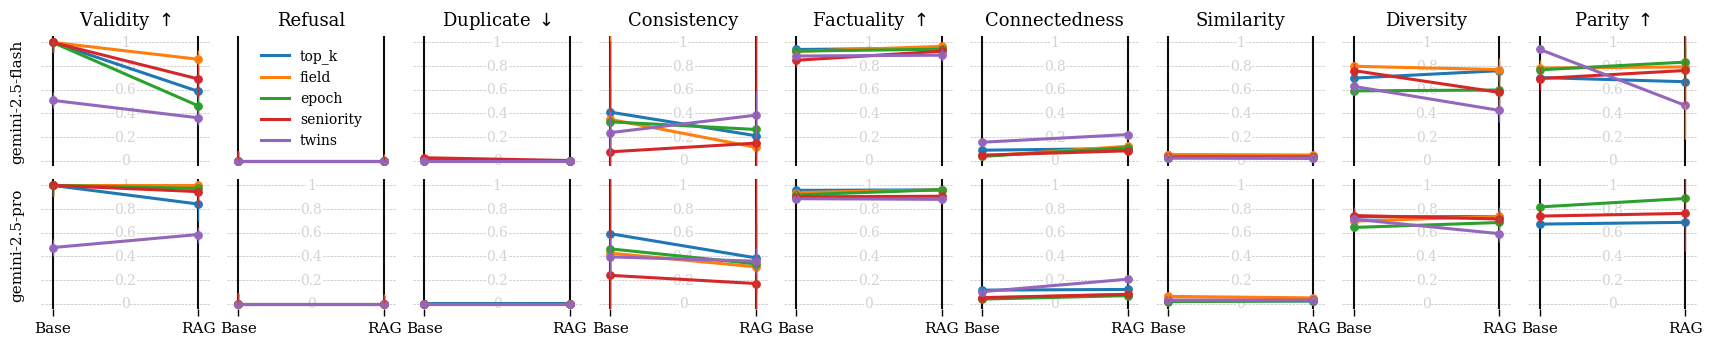

In [117]:
row_legend_specs = {
    "gemini-2.5-flash": {"col": 1, "ncol": 1, "y": 1.0},
}

def cell_spec_fnc(row_key, r, c, panel):
    if panel.metric_name in {"refusal_pct"} and r==0:
        return grid.CellDrawSpec(draw_hlines=False, draw_internal_y_labels=False)
    return None

fig = grid.plot_before_after_task_grid(
    df_before_group,
    df_after_group,


    panels=grid_constants.PANEL_INFRASTRUCTURE,

    row_cols=("model",),
    hue_col="task_name",
    hue_order=constants.EXPERIMENT_TASKS,
    hue_colors=grid_constants.TASK_COLORS,
    metric_col="metric_name",
    x_labels=("Base", "RAG"),

    layout=grid.LayoutSpec(
        figsize=(18, 3.5),
        wspace=0.1,
        hspace=0.1,
        left=0.07,
        right=0.99,
        top=0.92,
        bottom=0.14),

    style=grid.StyleSpec(
        title_fontsize=13,
        tick_fontsize=11,
        ylabel_fontsize=11,
        legend_fontsize=10,
        line_width=2.2,
        point_size=30,
        annotate_points=False,
        draw_y_hlines=True,
        hline_alpha=0.25,
        hline_lw=0.5,
        hline_style='--',
        show_internal_y_labels=True,
        internal_y_label_x=0.5,
        internal_y_label_fontsize=10,
        internal_y_label_alpha=1.,
        internal_y_label_color='lightgray',
        x_vlines_lw=1.5,
        row_label_x=-0.1

    ),


    row_label_map={
        "epoch": "Epoch",
        "field": "Field",
        "seniority": "Seniority",
        "top_k": "Top-k",
        "twins": "Twins",
    },
    
    
    row_legend_specs=row_legend_specs,
    
    global_ylim=(-0.05, 1.05),
    global_yticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0],
    cell_spec_fnc = cell_spec_fnc
)

fn = io.path_join(PLOTS_PATH, f'{PREFIX_RAG}_by_model_task.pdf')
fig.savefig(fn, dpi=constants.FIG_DPI, bbox_inches='tight')

grid.plt.show()
grid.plt.close()


In [107]:
df_after_group.query("model=='gemini-2.5-flash' and task_name=='field' and metric_name=='consistency'")

,model_group,model_kind,model,task_name,n,metric_name,mean,std,median,sum,ci,ci_low,ci_high
91,model_access,proprietary,gemini-2.5-flash,field,2,consistency,0.112263,0.006936,0.112263,0.224526,0.062316,0.049947,0.174579
106,model_size,S,gemini-2.5-flash,field,2,consistency,0.112263,0.006936,0.112263,0.224526,0.062316,0.049947,0.174579
111,model_class,reasoning,gemini-2.5-flash,field,2,consistency,0.112263,0.006936,0.112263,0.224526,0.062316,0.049947,0.174579


# OLD

In [35]:
WIDTH = 0.2
FIGSIZE = (10, 2.)
FIGSIZE_TOP = (10, 2.3)

PLOT_KWARGS = {'figsize':FIGSIZE,  'show_xticks':True, 'width_bar':WIDTH, 'show_xlabel':True, 'xlabel':'task'}
PLOT_KWARGS_L = {'figsize':FIGSIZE_TOP,  'show_xticks':True, 'width_bar':WIDTH, 'show_legend':True, 'show_xlabel':True, 'xlabel':'task'}
PLOT_KWARGS_TOP = {'figsize':FIGSIZE, 'show_legend':True, 'width_bar':WIDTH, 'show_xticks':True, 'show_xlabel':True, 'xlabel':'task'}

PREFIX = f'rag'

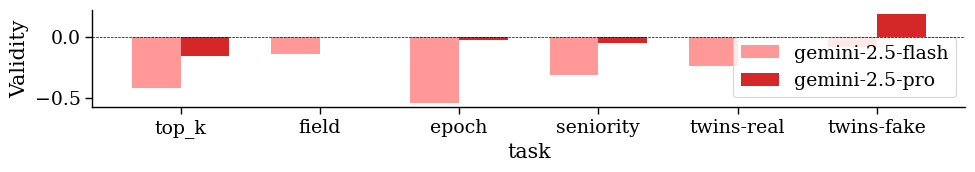

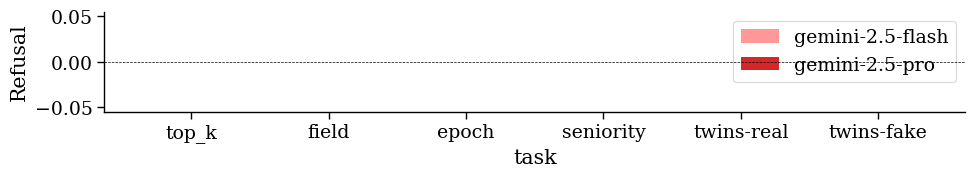

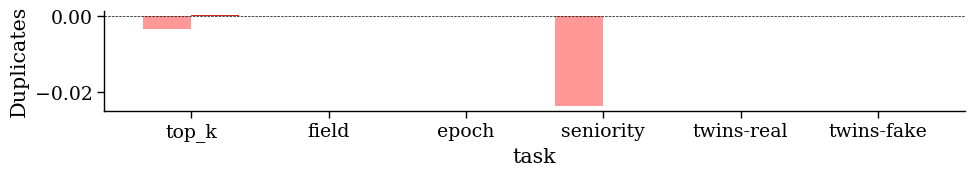

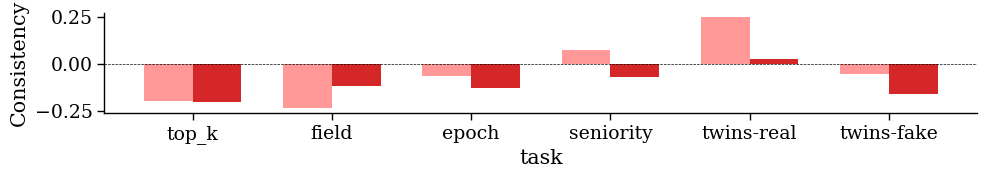

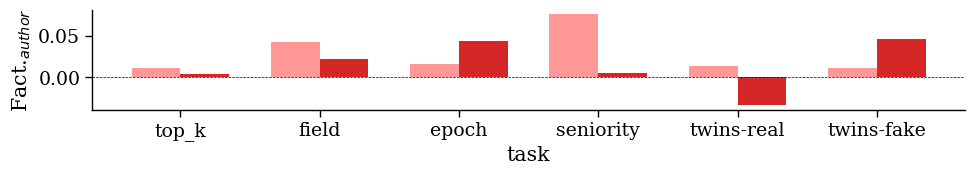

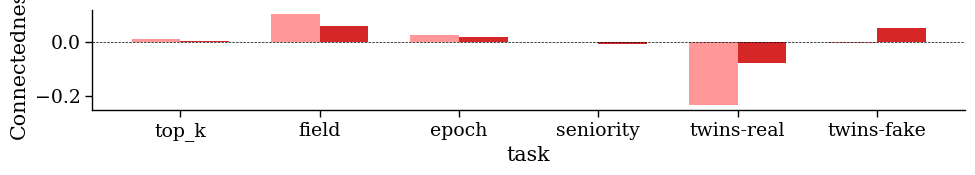

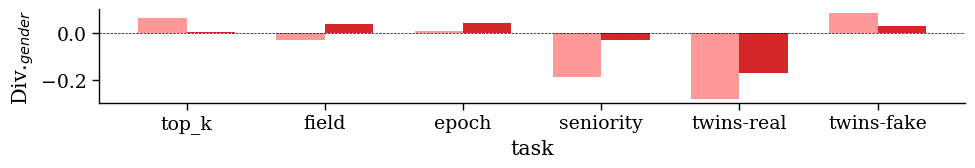

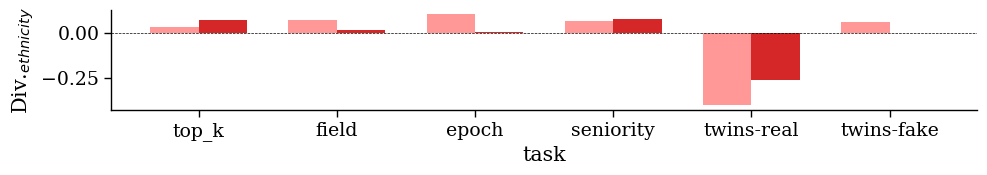

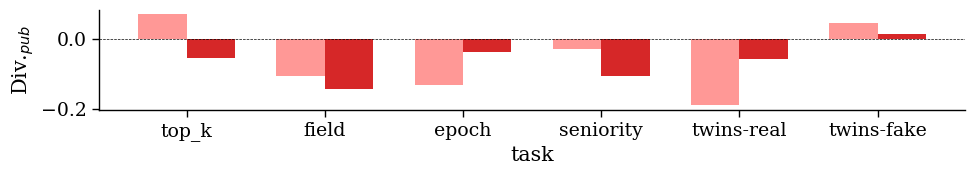

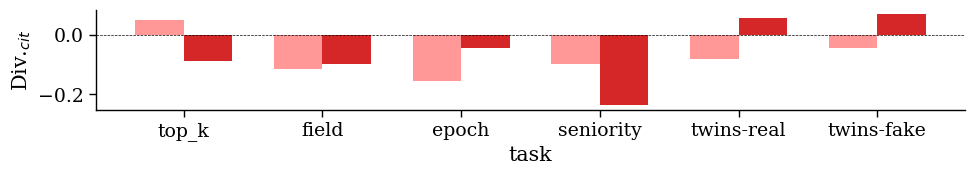

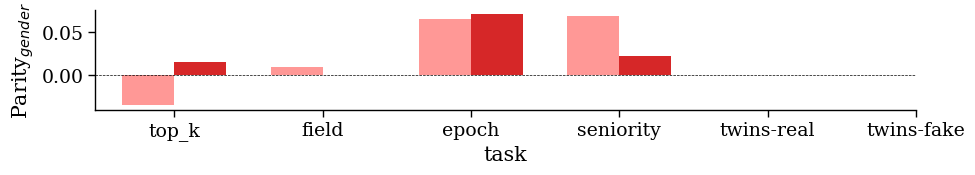

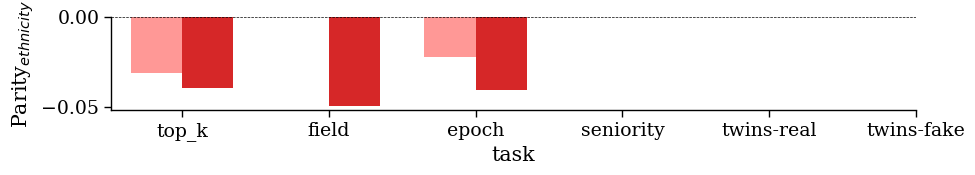

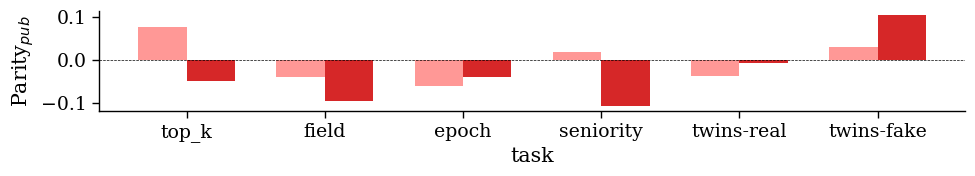

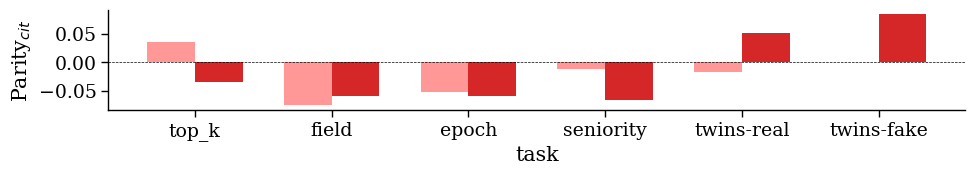

In [36]:
key = ['model', 'task_name']
x_order = constants.EXPERIMENT_TASKS
x_order = [c for c in x_order if c != 'twins'] + ['twins-real', 'twins-fake']  

def _rename_twins(row):
    if row['task_name'] == 'twins':
        return 'twins-real' if 'famous' in row['task_param'] or 'random' in row['task_param'] else 'twins-fake'
    else:
        return row['task_name']

for i, metric in enumerate(helpers_metrics.METRICS):

    fn = helpers_metrics.get_plot_fn(metric, PLOTS_PATH, prefix=PREFIX)

    per_attempt = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query)
    per_attempt = helpers.add_infrastructure_columns(per_attempt)

    per_attempt_rag = helpers_metrics.load_per_attempt(metric, None, TABLES_PATH).query(query_rag)
    per_attempt_rag = helpers.add_infrastructure_columns(per_attempt_rag)

    per_attempt.task_name = per_attempt.apply(lambda row: _rename_twins(row), axis=1)
    per_attempt_rag.task_name = per_attempt_rag.apply(lambda row: _rename_twins(row), axis=1)

    per_group = aggregators.aggregate_per_group(per_attempt, key)
    per_group_rag = aggregators.aggregate_per_group(per_attempt_rag, key)
    per_group_rag.model = per_group_rag.model.str.replace('-grounded', '')

    per_group.set_index(key, inplace=True)
    per_group_rag.set_index(key, inplace=True)

    df_diff = per_group_rag - per_group
    df_diff.loc[:,'metric'] = metric
    df_diff.reset_index(inplace=True)

    kwargs = PLOT_KWARGS_TOP if metric in ['validity_pct', 'refusal_pct'] else PLOT_KWARGS
    vis.plot_metric_bars_by_groups(df_diff, x_col='task_name', hue_col="model", metric_col="mean", 
                                    fn=fn, x_order=x_order, ylabel=metric, **kwargs)
